In [151]:
#Connecting My Google Drive with Colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [152]:
#Importing all the required libraries
import numpy as no
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [153]:
#Loading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [154]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [155]:
data.shape

(1000, 2)

In [156]:
data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [157]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

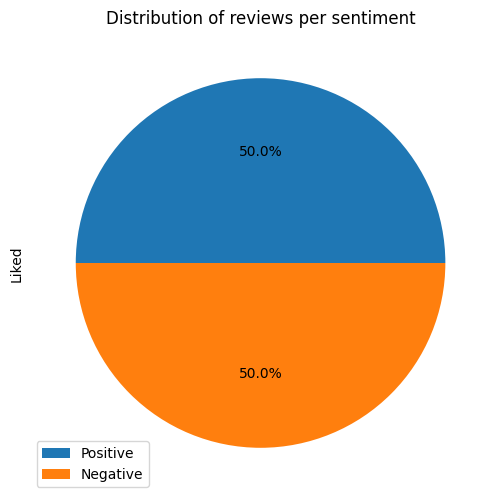

In [158]:
data['Liked'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

This clearly shows that our database has mixed reviews

## We will split the data in Train and Test Datasets



In [159]:
from sklearn.model_selection import train_test_split

features = data.drop("Liked",axis=1)
labels = data["Liked"]

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.90, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))

Data distribution:
- Train: 50 
- Validation: 25 
- Test: 25


## Preprocessing the data

1.   Tokenize sentences
2.   Remove capital letter
3.   Remove Stop words
4.   Remove non-alphanumeric characters
5.   Lemmatize the tokens



In [160]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [161]:
stopword = nltk.corpus.stopwords.words('english')[:115]
", ".join(stopword)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [162]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')[:120]
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

Processing data...
Creating word clouds...


<ipython-input-163-7b850c2f3e63>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean']=data['Review'].map(clean)
<ipython-input-163-7b850c2f3e63>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text']=data['clean'].apply(lambda x: " ".join([str(word) for word in x]))


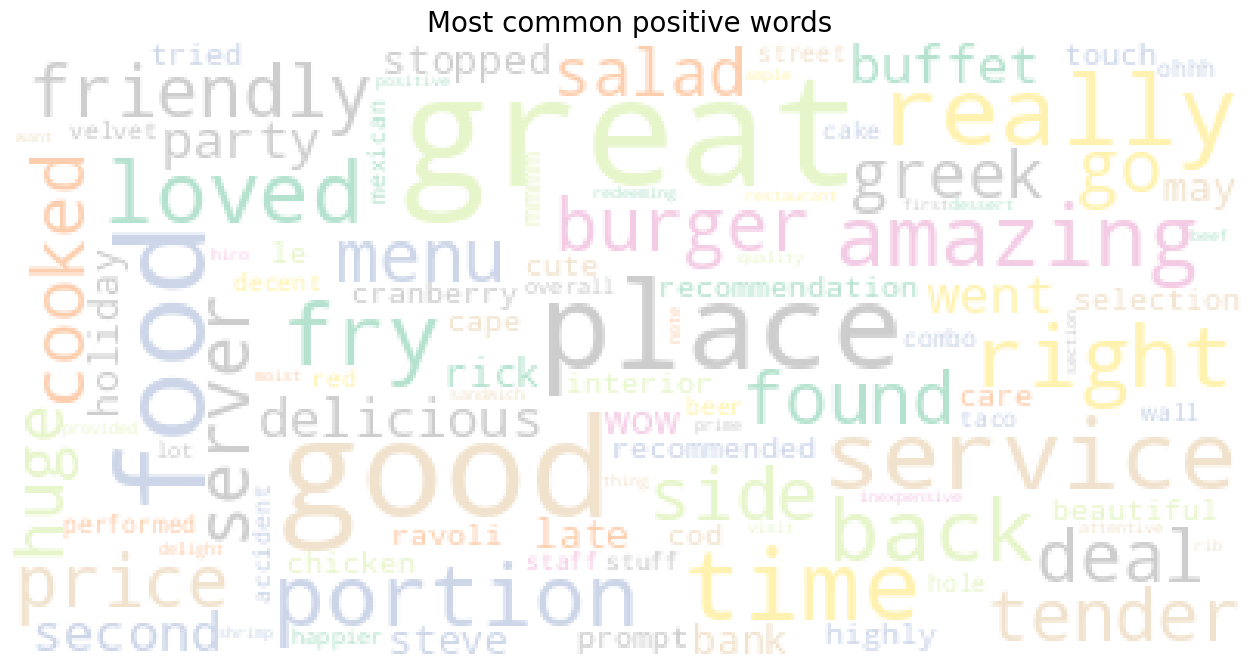

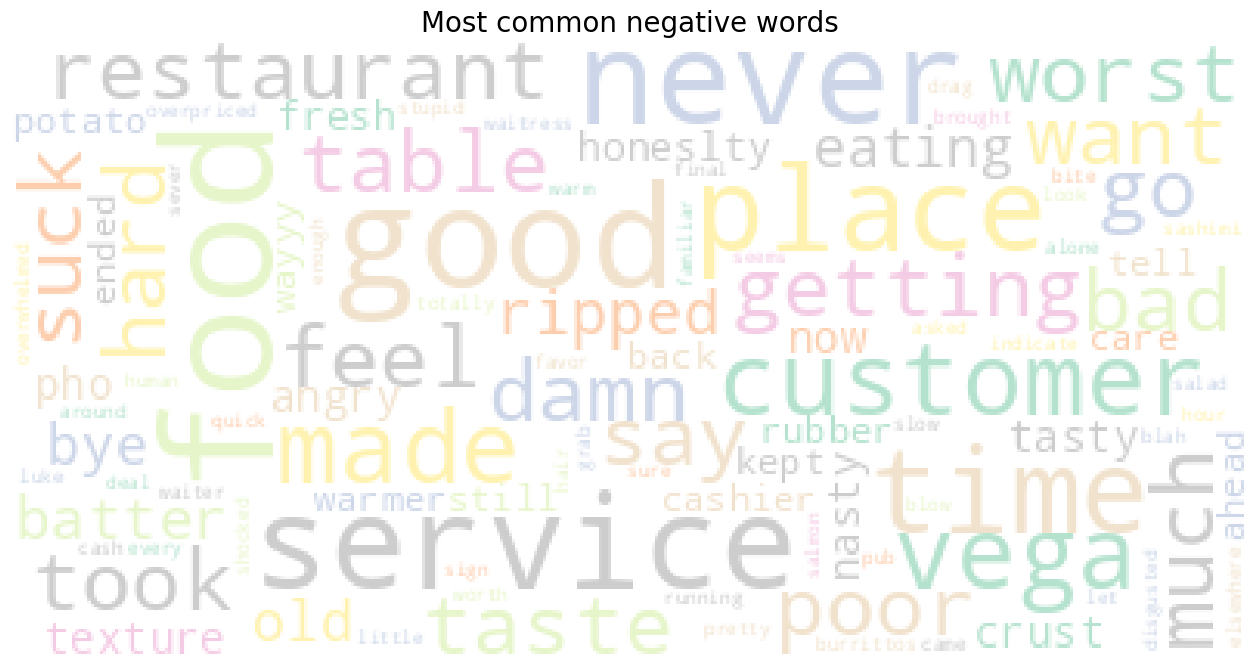

In [163]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

data=data.head(100)
print("Processing data...")
data['clean']=data['Review'].map(clean)
data['clean_text']=data['clean'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
positive_words=" ".join(data[data.Liked==1]['clean_text'].values)
negative_words=" ".join(data[data.Liked==0]['clean_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [165]:
tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(X_train['Review'])
X_train=vectorize(X_train['Review'],tfidf_vect_fit)

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)

In [167]:
print(scores)
scores.mean()

[0.8 0.5 0.6 0.6 0.5]


0.6

In [168]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [169]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 5}

0.6 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.6 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.6 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.6 (+/-0.126) for {'max_depth': 10, 'n_estimators': 5}
0.6 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.6 (+/-0.0) for {'max_depth': 10, 'n_estimators': 100}
0.64 (+/-0.098) for {'max_depth': 20, 'n_estimators': 5}
0.58 (+/-0.08) for {'max_depth': 20, 'n_estimators': 50}
0.56 (+/-0.098) for {'max_depth': 20, 'n_estimators': 100}
0.6 (+/-0.219) for {'max_depth': None, 'n_estimators': 5}
0.56 (+/-0.16) for {'max_depth': None, 'n_estimators': 50}
0.58 (+/-0.08) for {'max_depth': None, 'n_estimators': 100}


In [170]:
cv.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=5)

In [171]:
X_val=vectorize(X_val['Review'],tfidf_vect_fit)

In [172]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [173]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val,y_pred), 3)
    precision = round(precision_score(y_val,y_pred), 3)
    recall = round(recall_score(y_val,y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth, mdl.n_estimators, accuracy, precision, recall))

MAX DEPTH: 20 / # OF EST: 100 -- A: 0.52 / P: 0.455 / R: 1.0
MAX DEPTH: None / # OF EST: 100 -- A: 0.48 / P: 0.435 / R: 1.0
MAX DEPTH: None / # OF EST: 5 -- A: 0.44 / P: 0.409 / R: 0.9


In [174]:
X_test=vectorize(X_test['Review'],tfidf_vect_fit)

y_pred = rf1.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred), 3)
precision = round(precision_score(y_test,y_pred), 3)
recall = round(recall_score(y_test,y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth, rf3.n_estimators, accuracy, precision,recall))

MAX DEPTH: None / # OF EST: 5 -- A: 0.52 / P: 0.545 / R: 0.857


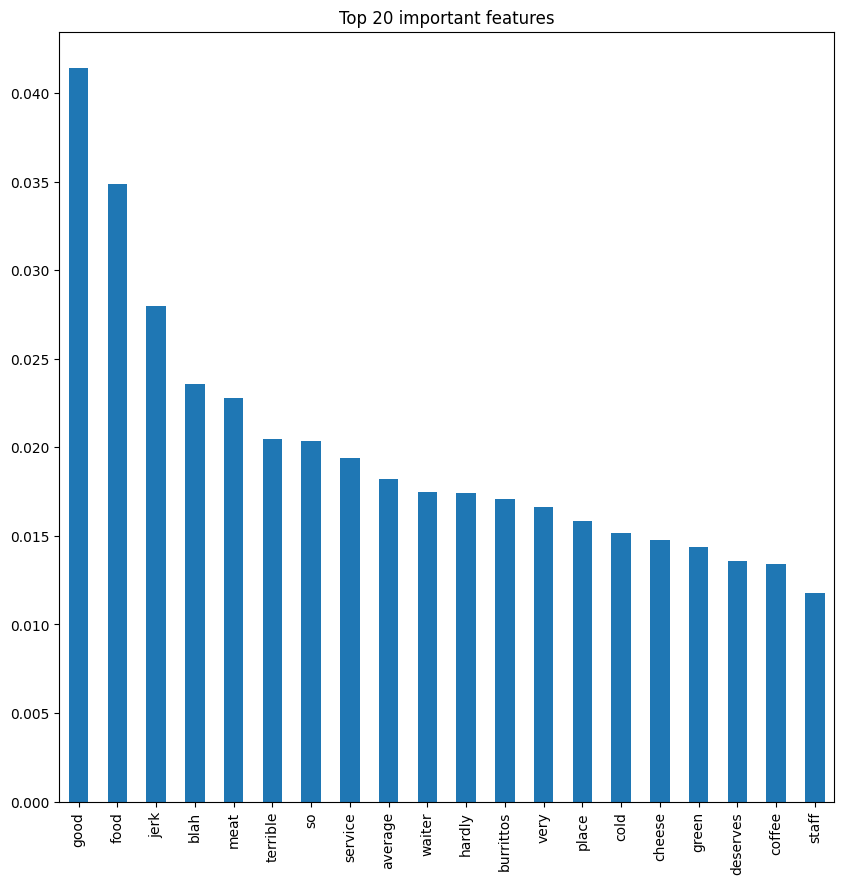

In [175]:
feat_importances = pd.Series(rf2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

We can clearly see that the score is much less as compared to the Niave Bayes Algorithm